In [1]:
# importing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.shape)
ev_data.head()

(177866, 17)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


* VIN (1-10): Partial Vehicle Identification Number.
* County: The county in which the vehicle is registered.
* City: The city in which the vehicle is registered.
*State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
* Postal Code: The postal code where the vehicle is registered.
* Model Year: The year of the vehicle model.
* Make: The manufacturer of the vehicle.
* Model: The model of the vehicle.
* Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
* Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
* Electric Range: The maximum range of the vehicle on a single charge (in miles).
* Base MSRP: The Manufacturer’s Suggested Retail Price.
* Legislative District: The legislative district where the vehicle is registered.
* DOL Vehicle ID: Department of Licensing Vehicle Identification.
* Vehicle Location: Geographic coordinates of the vehicle location.
* Electric Utility: The electric utility service provider for the vehicle’s location.
* 2020 Census Tract: The census tract for the vehicle’s location.

In [2]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [3]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
# droping Null Values
ev_data.dropna(inplace=True)
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [5]:
# checking duplicate Values
ev_data.duplicated().sum()

0

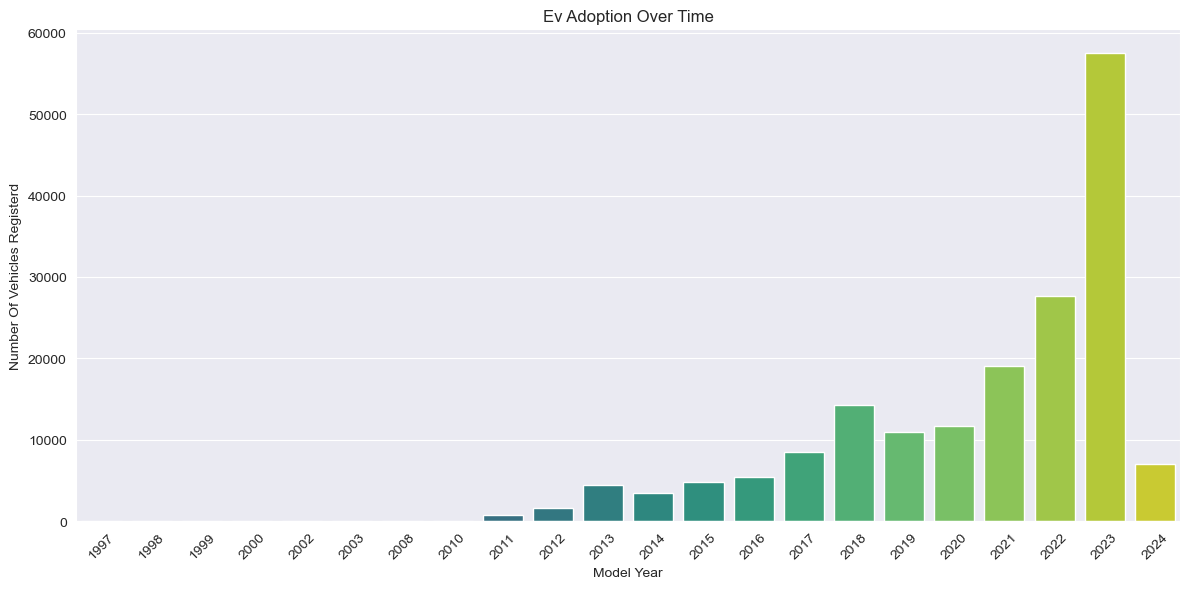

In [6]:
# Ev Adoption Over Time
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))

ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y= ev_adoption_by_year.values, palette='viridis')
plt.title('Ev Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number Of Vehicles Registerd')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The data illustrates a steady rise in electric vehicle (EV) adoption, notably accelerating from around 2016 onwards.**

**2023 marks a notable peak in EV adoption, with a sharp increase in the number of registered EVs.**

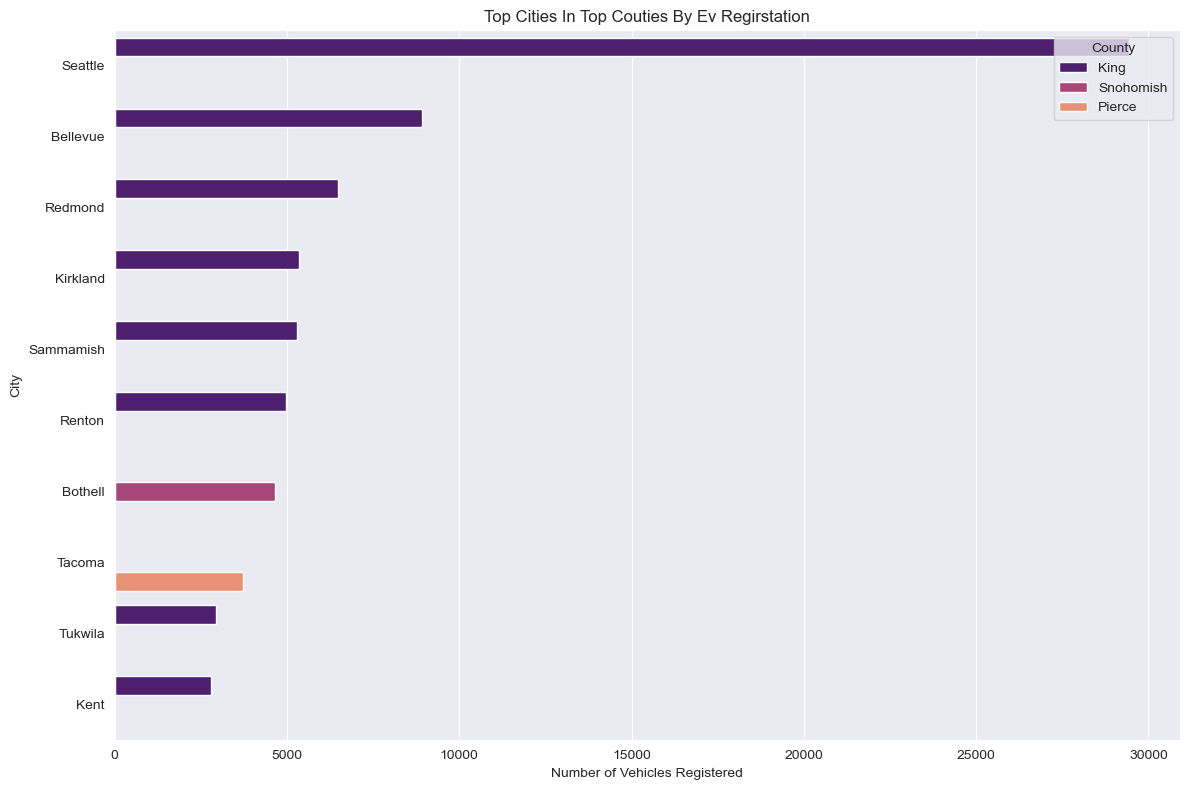

In [7]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset fot these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of Evs Within The cities of  these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles', y='City', hue='County',data=top_cities,palette='magma')
plt.title('Top Cities In Top Couties By Ev Regirstation')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

**Seattle, in King County, leads significantly, with Bellevue and Redmond following fewer registrations.**

**King County emerges as the epicenter of EV adoption, overshadowing Snohomish and Pierce counties.**

**Kirkland and Sammamish in Snohomish County show moderate EV registrations**

**Tacoma and Tukwila in Pierce County have the fewest registrations, indicating lower EV adoption.**


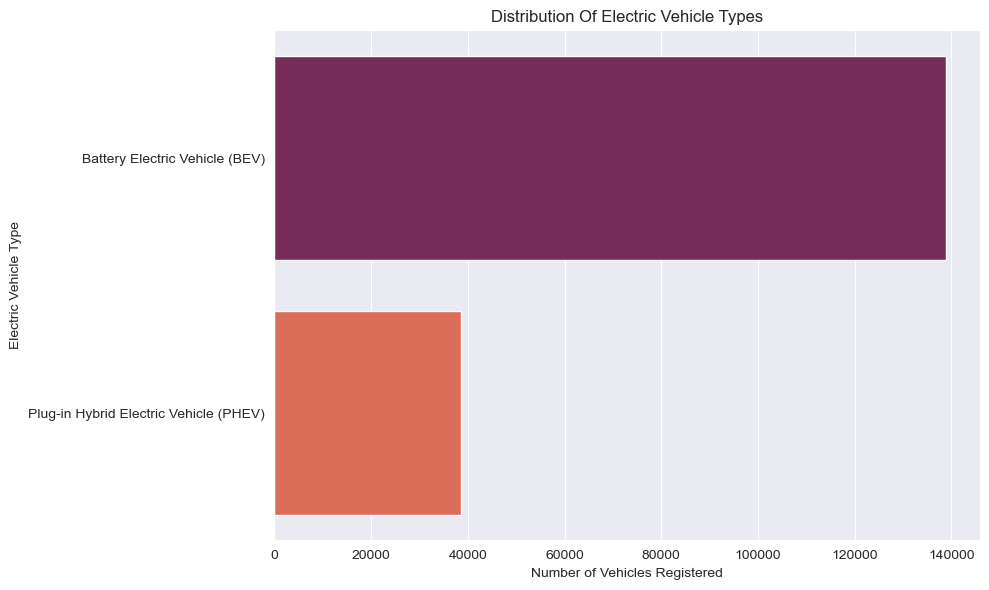

In [8]:
# Analyzing The Distribution Of Electric Vehicle Types

ev_type_distribution  = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution Of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

**The graph illustrates a preference for Battery Electric Vehicles (BEVs) over Plug-in Hybrid Electric Vehicles (PHEVs) among registered electric vehicles in the United States.**

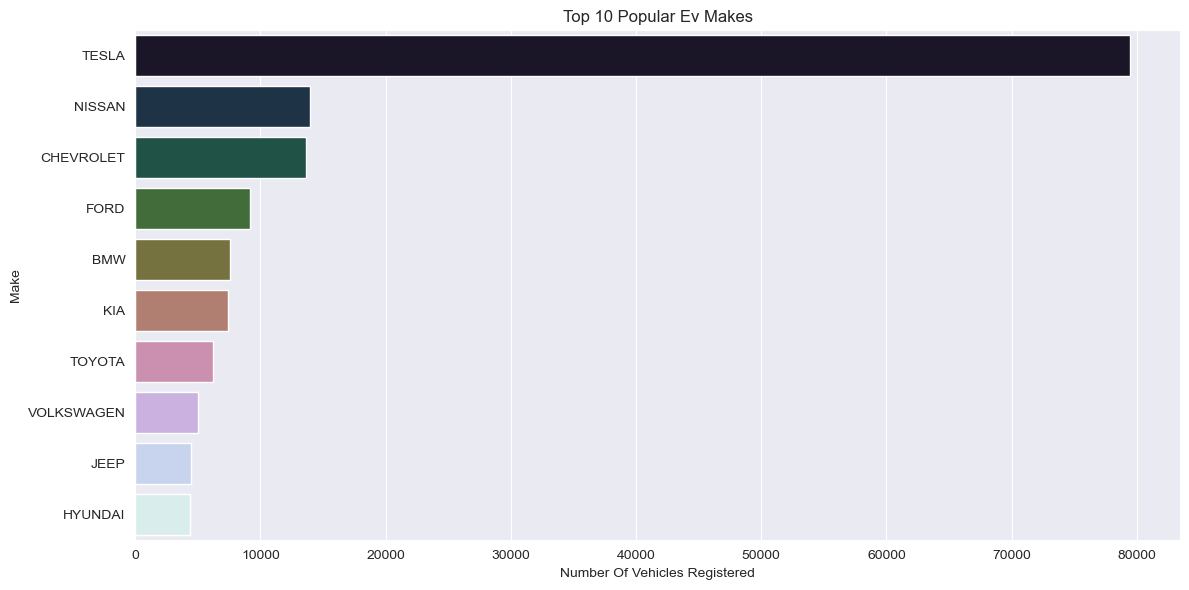

In [9]:
# analyzing The Popularity Of EV Manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette='cubehelix')
plt.title('Top 10 Popular Ev Makes')
plt.xlabel('Number Of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

**Tesla emerges as the frontrunner with the highest number of registered vehicles, significantly surpassing other manufacturers.**


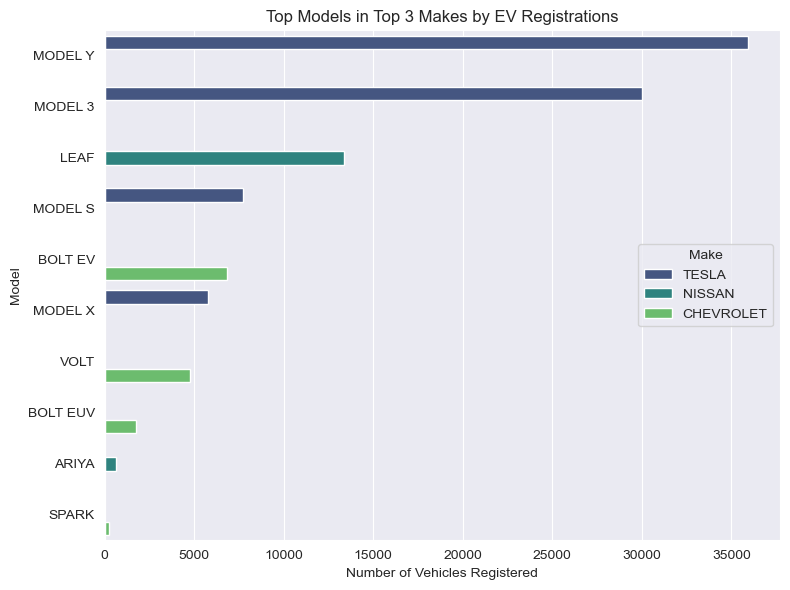

In [15]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

**Tesla's Model Y leads in registrations, followed closely by the Model 3, highlighting Tesla's strong market presence.**

**Nissan's Leaf ranks third overall and is the most registered non-Tesla vehicle, indicating its popularity among consumers.**

**BoltEV and Volt , showcasing Chevrolet's presence in the market.**

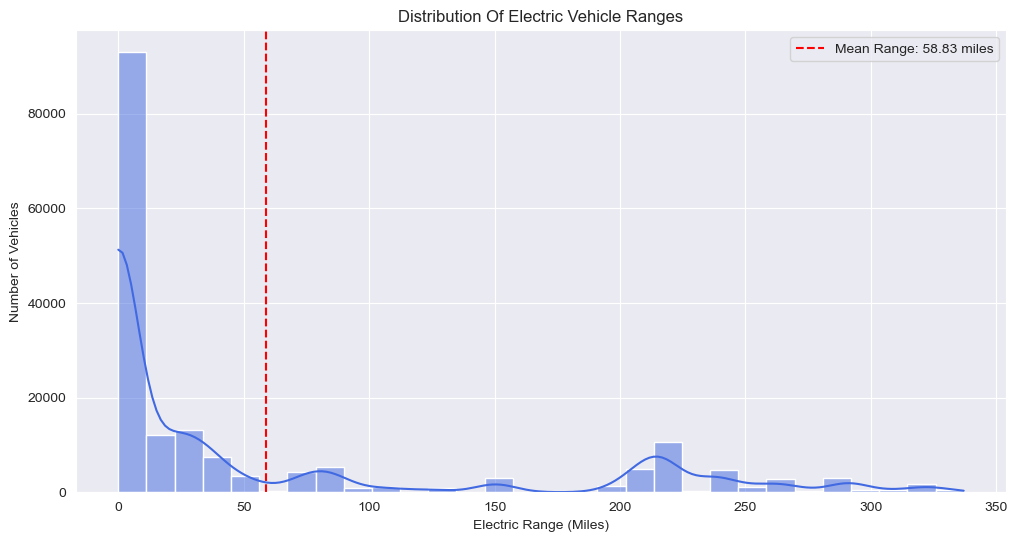

In [18]:
# Analyzing The Distribution Of Electric Range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('Distribution Of Electric Vehicle Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

**The graph indicates a significant concentration of electric vehicles with low ranges, notably peaking just before 50 miles.**

**The mean electric range for the vehicles depicted is approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.**

**despite some vehicles having ranges up to 350 miles, the majority fall below the mean range, suggesting that a substantial number of vehicles have shorter ranges, impacting the overall average.**

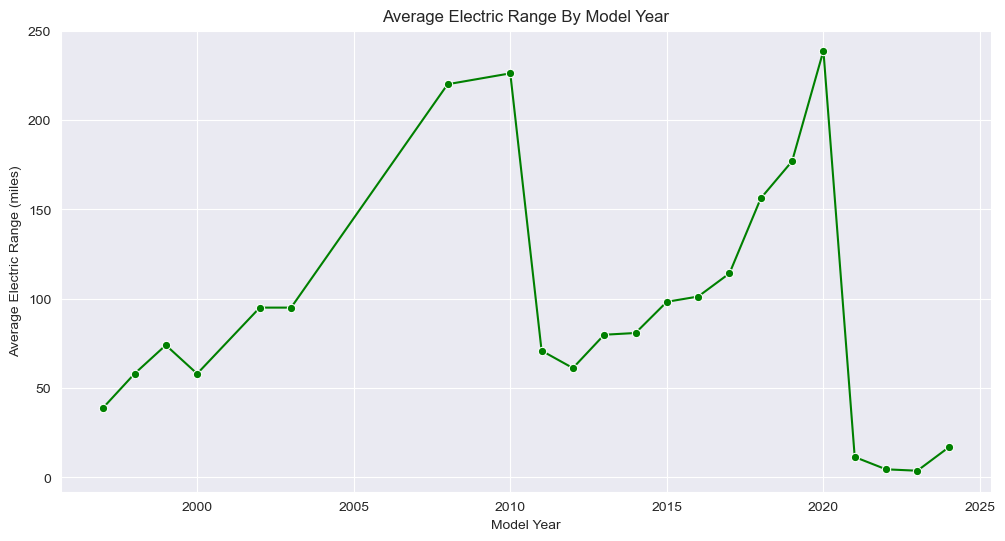

In [21]:
# calculating The average electric Range by Model Year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y ='Electric Range',data=average_range_by_year, marker='o',color='green')
plt.title('Average Electric Range By Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

**The graph illustrates a consistent increase in the average electric range of electric vehicles (EVs) from around 2000 to 2020, indicating advancements in technology and battery efficiency.**

**A notable peak in the average range is observed around 2020**

**Drop post-2020  there's a noticeable decline in the average range, possibly indicating incomplete data or the introduction of lower-range models.**

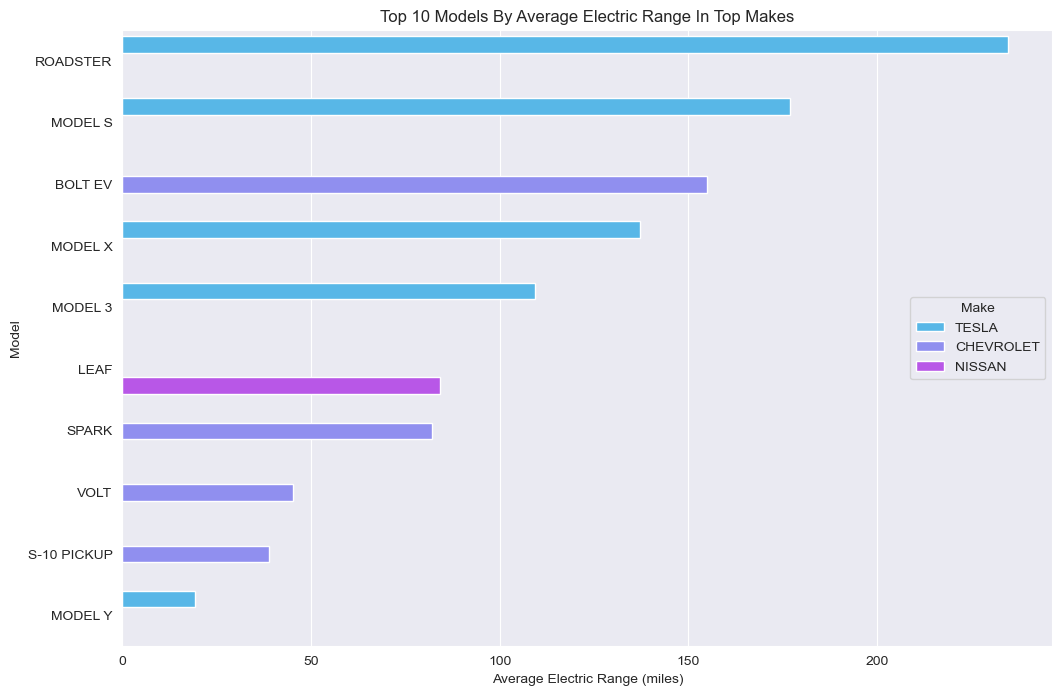

In [23]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_model = average_range_by_model.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_model,palette='cool')
plt.title('Top 10 Models By Average Electric Range In Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title ='Make',loc='center right')
plt.show()

**Tesla's Roadster leads with the highest average electric range**

**Tesla's models (Roadster, Model S, Model X, and Model 3) consistently have higher average electric ranges compared to other manufacturers, highlighting Tesla's leadership in range innovation.**

**The Chevrolet Bolt EV is notable among Chevrolet models**

In [24]:
# calculate The Number Of Evs Registered Each Year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
print(ev_registration_counts)

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64


* In 2021, there were 19,063 EVs registered.
* In 2022, the number increased to 27708 EVs.
* In 2023, a significant jump to 57,519 EVs was observed.

In [31]:
# Forecast the total number of EVs registered in 2024 using a growth rate based on previous complete years.
from scipy.optimize import  curve_fit

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b*x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024+6)- filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(),forecasted_values))

forecasted_evs 

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

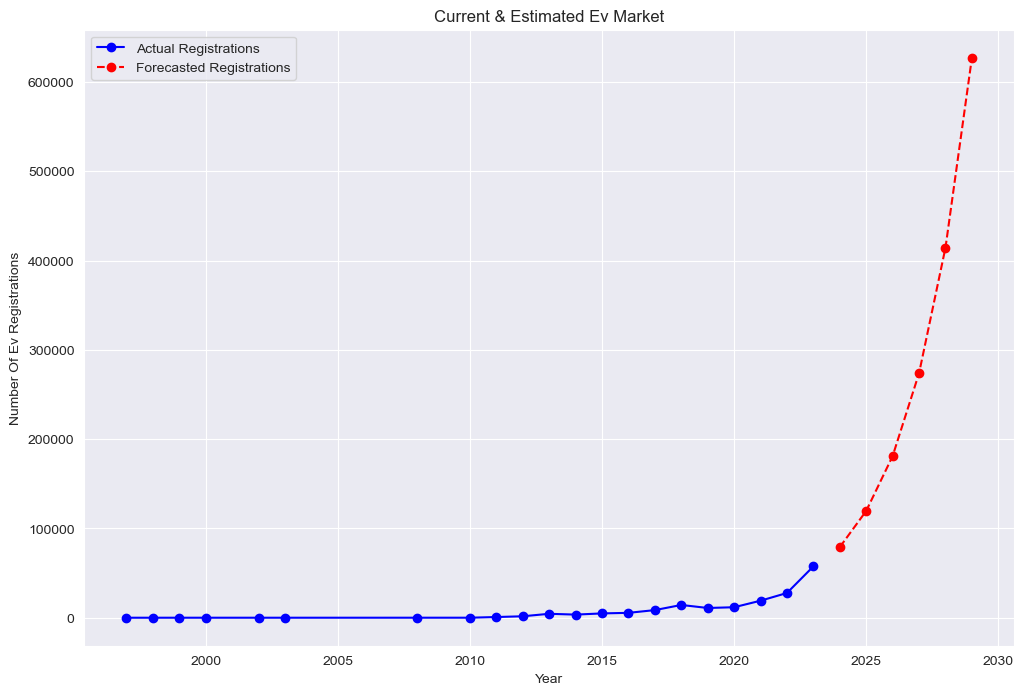

In [32]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024,2029+1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years, actual_values, 'bo-', label ='Actual Registrations')
plt.plot(forecast_years_full,forecasted_values_full, 'ro--', label='Forecasted Registrations')
plt.title('Current & Estimated Ev Market')
plt.xlabel('Year')
plt.ylabel('Number Of Ev Registrations')
plt.legend()
plt.grid(True)
plt.show()

**EV registrations remained low and stable until around 2010, followed by a consistent and steep upward trend, indicating a significant surge in EV adoption.**

**The forecasted EV registrations indicate an even more dramatic rise in the near future, with a sharp increase expected in the coming years.**


##### The EV market is expected to expand considerably, driven by growing registrations and projected acceleration, signaling promising opportunities for investment and business growth.
    